In [2]:
import pandas as pd
import glob

In [3]:
#list columns
dforig = pd.read_csv("/data/track-ml/sorted-datasets/event000001000")
print(list(dforig.columns.values))

['particle_id', 'vx', 'vy', 'vz', 'px', 'py', 'pz', 'q', 'n_hits', 'hit_id_0', 'x_0', 'y_0', 'z_0', 'rho_0', 'eta_0', 'phi_0', 'volume_id_0', 'layer_id_0', 'module_id_0', 'value_0', 'hit_id_1', 'x_1', 'y_1', 'z_1', 'rho_1', 'eta_1', 'phi_1', 'volume_id_1', 'layer_id_1', 'module_id_1', 'value_1', 'hit_id_2', 'x_2', 'y_2', 'z_2', 'rho_2', 'eta_2', 'phi_2', 'volume_id_2', 'layer_id_2', 'module_id_2', 'value_2', 'hit_id_3', 'x_3', 'y_3', 'z_3', 'rho_3', 'eta_3', 'phi_3', 'volume_id_3', 'layer_id_3', 'module_id_3', 'value_3', 'hit_id_4', 'x_4', 'y_4', 'z_4', 'rho_4', 'eta_4', 'phi_4', 'volume_id_4', 'layer_id_4', 'module_id_4', 'value_4', 'hit_id_5', 'x_5', 'y_5', 'z_5', 'rho_5', 'eta_5', 'phi_5', 'volume_id_5', 'layer_id_5', 'module_id_5', 'value_5', 'hit_id_6', 'x_6', 'y_6', 'z_6', 'rho_6', 'eta_6', 'phi_6', 'volume_id_6', 'layer_id_6', 'module_id_6', 'value_6', 'hit_id_7', 'x_7', 'y_7', 'z_7', 'rho_7', 'eta_7', 'phi_7', 'volume_id_7', 'layer_id_7', 'module_id_7', 'value_7', 'hit_id_8', '

In [4]:
#generate inputfile for trainning or inference
totalFiles=200
countfile=0
#files = glob.glob('/data/track-ml/sorted-datasets/event00000100*', recursive=False) 
#files = glob.glob('/data/track-ml/sorted-datasets/*', recursive=False) 
files = glob.glob('/data/track-ml/sorted-datasets/event000002*', recursive=False) 

dfInputforNN = pd.DataFrame()

for f in files:
    #print(f)
    totdf = pd.read_csv(f) 
    #print(totdf.shape)
    frames = [dfInputforNN, totdf]

    result = pd.concat(frames, ignore_index=True)
    dfInputforNN=result
    countfile=countfile+1
    if (countfile >= totalFiles):
        break
            
print(result.shape)


(1876609, 229)


In [5]:
#select By eta-phi the tracks that will be trained

print(result['eta_0'].min(),result['eta_0'].max())
print(result['eta_1'].min(),result['eta_1'].max())
print(result['eta_2'].min(),result['eta_2'].max())
print(result['eta_3'].min(),result['eta_3'].max())

dforigFiltered=result[ ((result['phi_0'] >= -0.5) & (result['phi_0'] <=0.5) )]

dforigFiltered=dforigFiltered[ ((dforigFiltered['phi_1'] >= -0.5) & (dforigFiltered['phi_1'] <=0.5) )]
dforigFiltered=dforigFiltered[ ((dforigFiltered['phi_2'] >= -0.5) & (dforigFiltered['phi_2'] <=0.5) )]
dforigFiltered=dforigFiltered[ ((dforigFiltered['phi_3'] >= -0.5) & (dforigFiltered['phi_3'] <=0.5) )]

print(dforigFiltered['eta_0'].min(),dforigFiltered['eta_0'].max())
print(dforigFiltered['eta_1'].min(),dforigFiltered['eta_1'].max())
print(dforigFiltered['eta_2'].min(),dforigFiltered['eta_2'].max())
print(dforigFiltered['eta_3'].min(),dforigFiltered['eta_3'].max())


'''
dforigFiltered=dforigFiltered[ ((dforigFiltered['eta_0'] >= -0.5) & (dforigFiltered['eta_0'] <=0.5) )]
dforigFiltered=dforigFiltered[ ((dforigFiltered['eta_1'] >= -0.5) & (dforigFiltered['eta_1'] <=0.5) )]
dforigFiltered=dforigFiltered[ ((dforigFiltered['eta_2'] >= -0.5) & (dforigFiltered['eta_2'] <=0.5) )]
dforigFiltered=dforigFiltered[ ((dforigFiltered['eta_3'] >= -0.5) & (dforigFiltered['eta_3'] <=0.5) )]
'''

print(dforigFiltered.shape)
dforigFiltered.to_csv('~/tracksForTrain.csv')

-0.8813736438751221 0.8813735842704773
-0.8813736438751221 0.8813735842704773
-0.8813736438751221 0.8813735842704773
-0.8813736438751221 0.8813735842704773
0.7921139001846313 0.8813735842704773
0.0 0.8813735842704773
0.0 0.8813735842704773
0.0 0.8813735842704773
(259153, 229)


In [6]:
#select a subset of database

print(dforigFiltered.shape)
dforigFiltered_minimum = dforigFiltered.iloc[0:10000,:]
print(dforigFiltered_minimum.shape)
dforigFiltered_minimum.to_csv("~/ifMin.csv")

(259153, 229)
(10000, 229)


In [63]:
resorgfile='/home/silvio/aux/resorg'
Res3file='/home/silvio/aux/Res3'
beforemappingRes3file='/home/silvio/aux/beforemappingRes3'

resorg = pd.read_csv(resorgfile)
df3dapp = pd.read_csv(Res3file)
df3d = pd.read_csv(beforemappingRes3file)

dftemp = pd.DataFrame(index=range(len(resorg)),columns=range(12))
dftemp[0]=resorg.iloc[:,[0]]
dftemp[1]=resorg.iloc[:,[1]]
dftemp[2]=resorg.iloc[:,[2]]

dftemp[3]=df3d.iloc[:,[0]]
dftemp[4]=df3d.iloc[:,[1]]
dftemp[5]=df3d.iloc[:,[2]]

dftemp[6]=df3dapp.iloc[:,[0]]
dftemp[7]=df3dapp.iloc[:,[1]]
dftemp[8]=df3dapp.iloc[:,[2]]

dftemp[9]=   (((dftemp[0]-dftemp[3])**2)+((dftemp[1]-dftemp[4])**2)+((dftemp[2]-dftemp[5])**2)).pow(1./2)
dftemp[10]=   (((dftemp[0]-dftemp[6])**2)+((dftemp[1]-dftemp[7])**2)+((dftemp[2]-dftemp[8])**2)).pow(1./2)
dftemp[11]=   (((dftemp[3]-dftemp[6])**2)+((dftemp[4]-dftemp[7])**2)+((dftemp[5]-dftemp[8])**2)).pow(1./2)

dftemp=dftemp.sort_values(by=[10])

print ("average distance prediction" , dftemp[9].mean())
print ("average distance approximation" , dftemp[10].mean())

dftemp22 = dftemp[ dftemp[10] == 0]
print ("0 diff" , dftemp22.shape[0])



average distance prediction 11648.029583953632
average distance approximation 12538.82142288894
0 diff 11


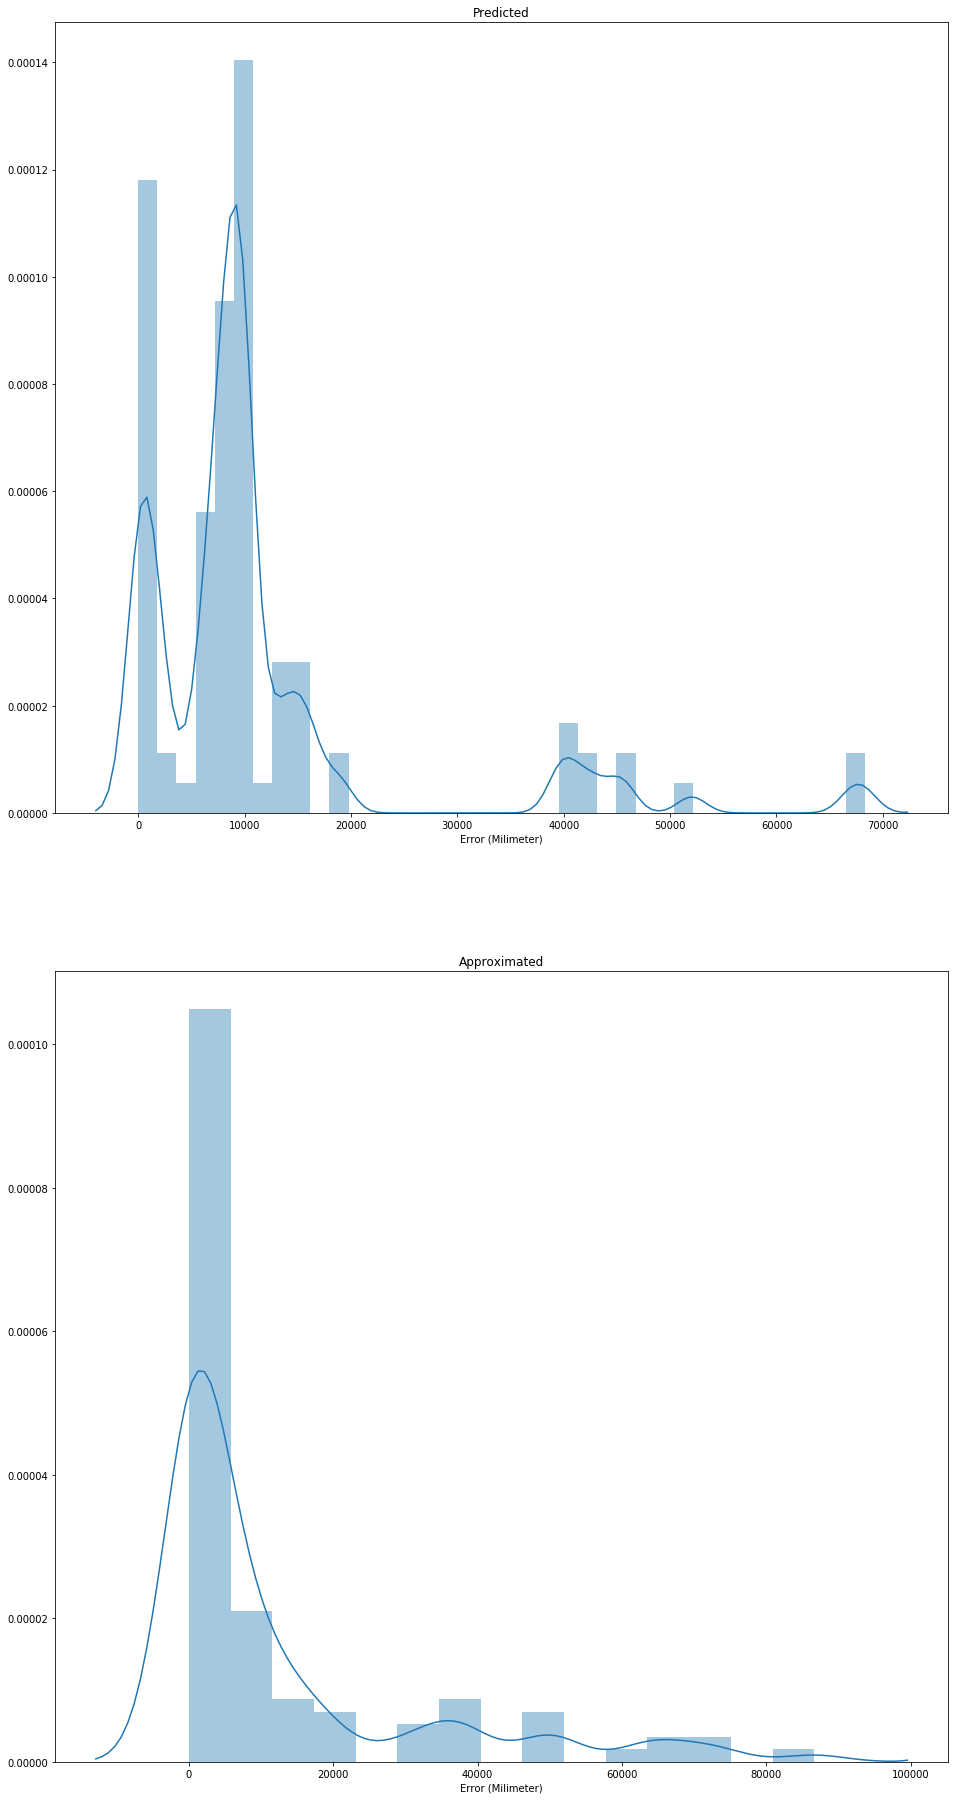

In [64]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# Predicted
data = dftemp.iloc[:,9:10]
# Approximated
data2 = dftemp.iloc[:,10:11]

# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(16, 32))

ax1 = fig.add_subplot(211)
ax1.set_title('Predicted')
ax1.set_xlabel('Error (Milimeter)')

ax2 = fig.add_subplot(212)
ax2.set_title('Approximated')
ax2.set_xlabel('Error (Milimeter)')

# Predicted
sns.distplot( data, ax=ax1)

# Approximated
sns.distplot(data2, ax=ax2)

plt.savefig('/home/silvio/aux/Predicted_Approximated.png')

plt.show()

